# 数据分析与可视化综合实验

# 实验目的

1. 熟悉Python标准库csv的用法
2. 熟悉CSV和txt文件操作
3. 熟练安装扩展库numpy pandas matplotilb
4. 熟悉使用扩展库pandas进行数据分析的基本操作
5. 熟悉使用扩展库matplotlib进行数据可视化的基本操作

# 实验内容

1. 运行下面的程序，在当前文件夹中生成饭店营业额模拟数据文件data.csv

In [2]:
import csv
import random
import datetime

fn ='data.csv'

with open(fn,'w')as fp:
    # 创建csv文件并且写入对象
    wr = csv.writer(fp,lineterminator='\n')
    # 写入表头
    wr.writerow(['日期','销量'])
    # 生成模拟数据
    startDate=datetime.date(2017,1,1)
    # 生成365个模拟数据，可以根据需要进行调整
    for i in range(365):
        # 生成一个模拟数据，写入csv文件
        amount=300+i*5+random.randrange(100)
        wr.writerow([str(startDate),amount])
        # 下一天
        startDate=startDate+datetime.timedelta(days=1)

2. 然后完成下面的任务
    1. 使用pandas读取文件data.csv中的数据，创建DataFrame对象，并且删除其中所有缺失值
    2. 使用matplotilb生成折线图，反应该饭店每天的营业额情况，并且把图形保存本地文件frist.jpg
    3. 按月份进行统计，使用matplotilb绘制柱状图显示每个月份的营业额，并把图形界面保存为本地we年second.jpg
    4. 按月份进行统计，找出相邻两个月最大涨幅，并把最大涨幅的月份写入文件maxMonth.txt
    5. 按季度统计该饭店2017年的营业额数据，使用matplotilb生成饼状图显示2017年四个季度的营业额分布情况，并且把图形保存为本地文件third.jpg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

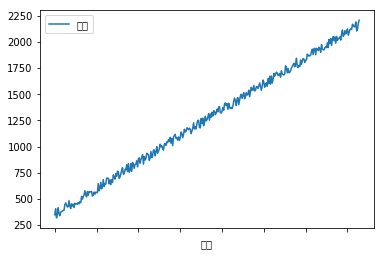

<Figure size 432x288 with 0 Axes>

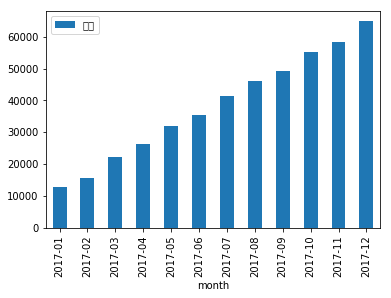

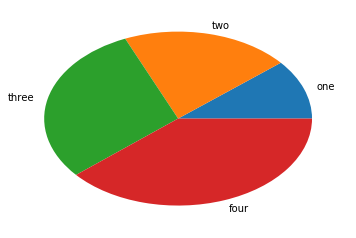

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据，丢弃缺失值
df = pd.read_csv('data.csv',encoding='cp936')
df = df.dropna()

# 生成营业额折线图
plt.figure()
df.plot(x='日期')
plt.savefig('frist.jpg')

# 按月统计，生成柱状图
plt.figure()
df1 = df[:]
df1['month']=df1['日期'].map(lambda x:x[:x.rindex('-')])
df1 = df1.groupby(by='month',as_index=False).sum()
df1.plot(x='month',kind='bar')
plt.savefig('second.jpg')

# 查找涨幅最大的月份，写入文件
df2=df1.drop('month',axis=1).diff()
m=df2['销量'].nlargest(1).keys()[0]
with open('MaxMonth.txt','w')as fp:
    fp.write(df1.loc[m,'month'])
    
# 按照季度统计 生成饼状图
plt.figure()
one = df1[:3]['销量'].sum()
two = df1[3:6]['销量'].sum()
three = df1[6:9]['销量'].sum()
four = df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
       labels=['one','two','three','four'])
plt.savefig('third.jpg')